### Student Information
Name:郭家安

Student ID:108061594

GitHub ID:John108061594

Kaggle name:John108061594

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency(個數) for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

### Ans:

In [1]:
import pandas as pd

anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [3]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

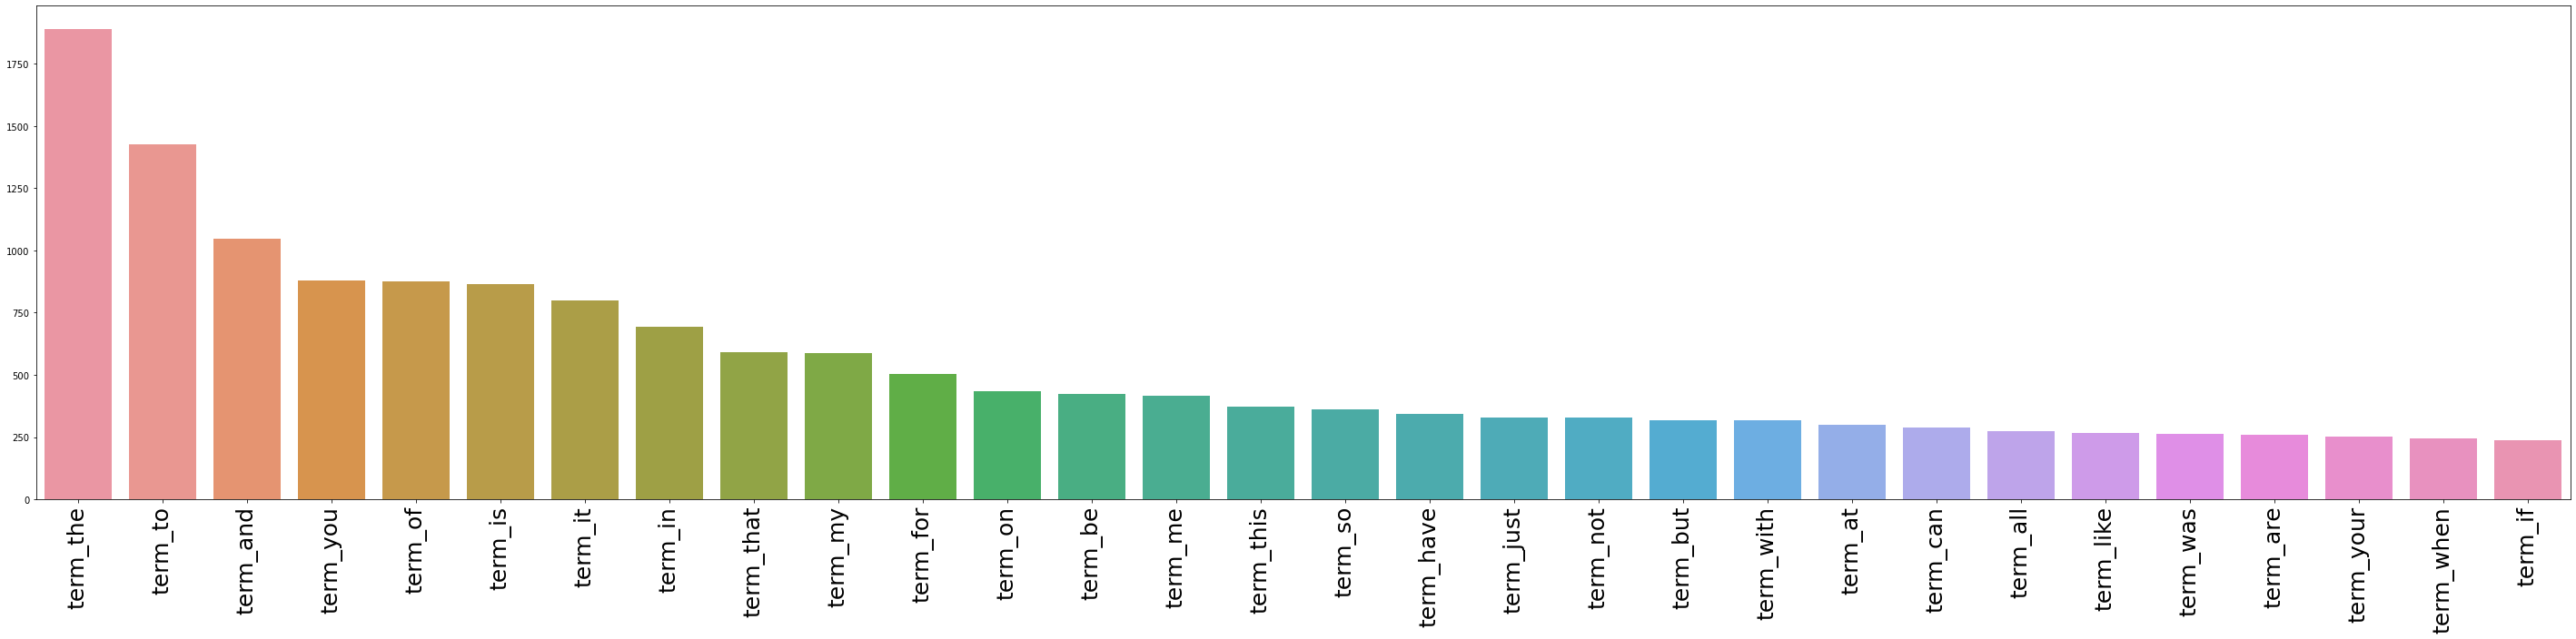

In [4]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

#fit count_vect
train_df_term_document_matrix_count = count_vect.fit_transform(train_df.text)
#trasform test_df.text into the TermDocumentMatrixCount
test_df_term_document_matrix_count = count_vect.transform(test_df.text)

import numpy as np
#sum
train_df_term_frequencies = np.asarray(train_df_term_document_matrix_count.sum(axis=0))[0]
test_df_term_frequencies = np.asarray(test_df_term_document_matrix_count.sum(axis=0))[0]
term_frequencies = train_df_term_frequencies + test_df_term_frequencies

#sort
dic = {'term':count_vect.get_feature_names(),
       'number':term_frequencies}

D = pd.DataFrame(dic)
D_sorted = D.sort_values(by='number',ascending=False)


#plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.subplots(figsize = (50,10))
ax = sns.barplot(x=['term_'+str(n) for n in list(D_sorted.term)[0:30]], 
                 y=np.array(D_sorted.number[0:30]))

ax.set_xticklabels(['term_'+str(n) for n in list(D_sorted.term)[0:30]],rotation = 90,fontsize = 25);

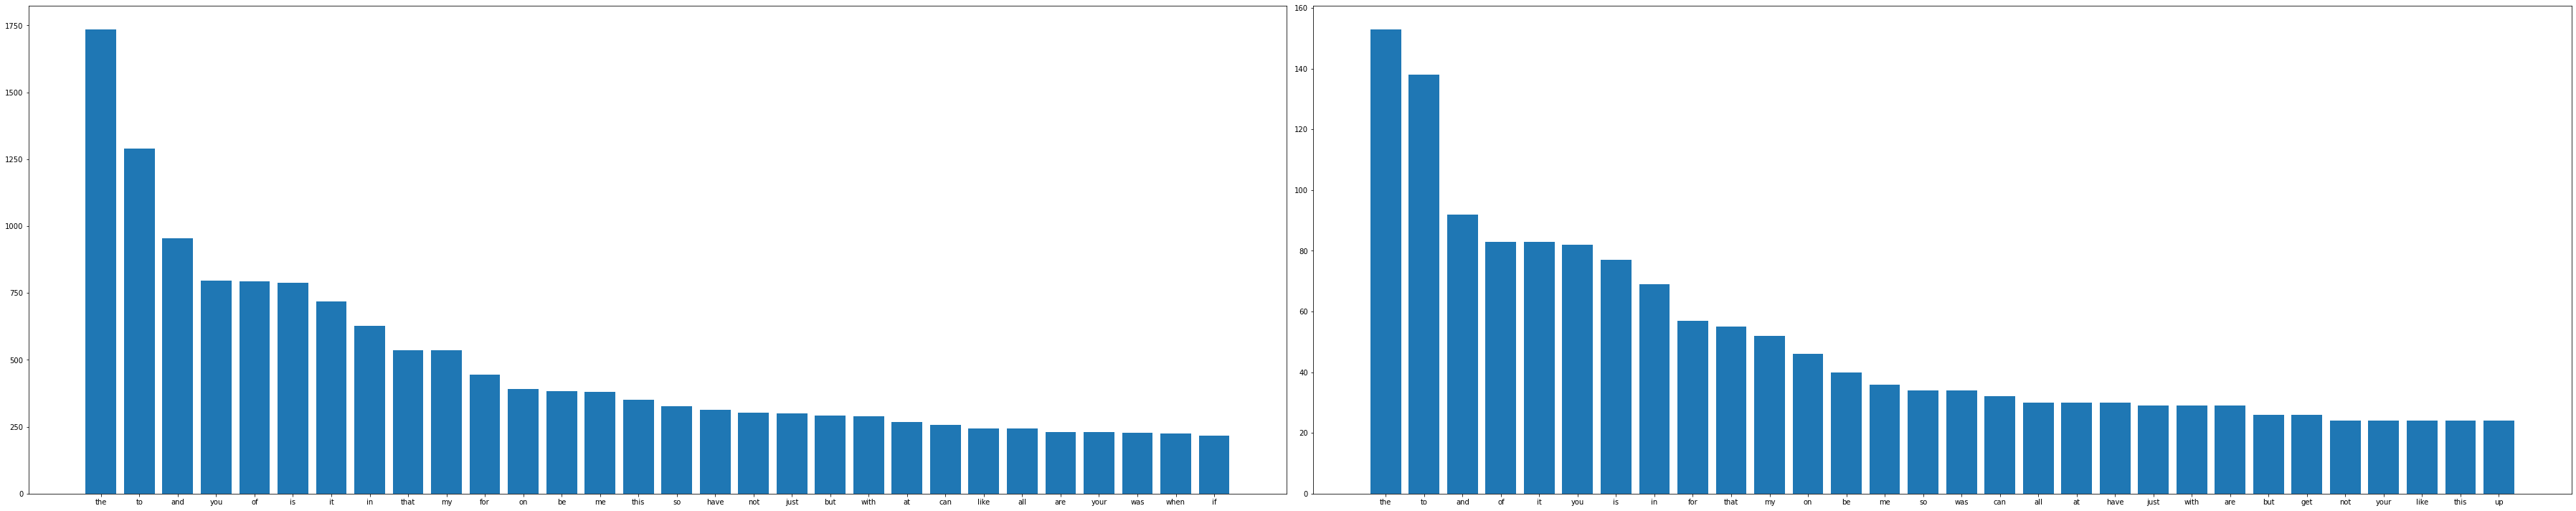

In [5]:
#because i don't know if the question asked us to plot respectively
sr_train_df_term_frequencies = pd.Series(train_df_term_frequencies, index=count_vect.get_feature_names())
sr_train_df_term_frequencies = sr_train_df_term_frequencies.sort_values(ascending=False)

sr_test_df_term_frequencies = pd.Series(test_df_term_frequencies, index=count_vect.get_feature_names())
sr_test_df_term_frequencies = sr_test_df_term_frequencies.sort_values(ascending=False)

fig1 = plt.figure(figsize = (50,10))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

ax1.bar(sr_train_df_term_frequencies.index[0:30], 
        sr_train_df_term_frequencies.values[0:30])

ax2.bar(sr_test_df_term_frequencies.index[0:30], 
        sr_test_df_term_frequencies.values[0:30])

plt.tight_layout();

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

### Ans:

In [6]:
import nltk

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdf_vectorizer_1000 = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)
TfIdf_vectorizer_1000.fit(train_df['text'])
train_data_TermDocumentMatrixTfIdf_1000 = TfIdf_vectorizer_1000.transform(train_df['text'])
print(train_data_TermDocumentMatrixTfIdf_1000.toarray())
TfIdf_vectorizer_1000.get_feature_names()[100:110]

C:\Users\John\Anaconda3\envs\HW2\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.2949158 0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.3339144 0.        ... 0.        0.        0.       ]]


['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?
![pic5](pics/pic5.png)

### Ans:

In [8]:
# Answer here
# A confusion matrix shows how many data objects are predicted correctly or wrong on each class. 
#'Anger'row shows how the the data objects of test data predicted as anger class by the model actually distributes over the class.
#'Anger'column shows how the the data objects of test data of anger class was predicted by the model.
#for example,'Anger'row shows there are 54 data objects of anger type,15 data objects of fear type,8 data objects of joy type,7 data objects of sadness type among all the data object predicted as anger type by the model.
#for example,'Anger'column shows there are 54 data objects predicted as anger type,13 data objects predicted as fear type,4 data objects predicted as joy type,7 data objects predicted as sadness type among all the data object of anger type.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### Ans:

In [9]:
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
model = MultinomialNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Ans:

In [11]:
# About the classification report,for the accuracy,the Naive Bayes has better result than the decision tree.
# The reason could be that the numbers of data object of test data are not homogeneous because the decision tree model prefer the class with more data objects.
# Maybe this scenario fits more Naive Bayes's independent hypothesis.
# And we can use decision tree's outcome as the baseline for other models.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation(預測) Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

### Ans:

In [12]:
training_log = pd.read_csv("logs/training_log.csv")

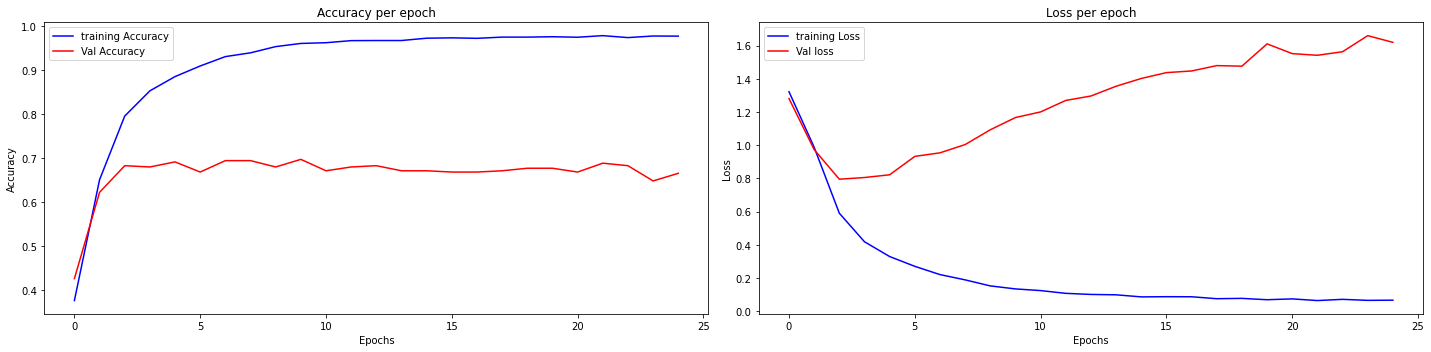

In [13]:
# Answer here
fig = plt.figure(figsize = (20,5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.plot(training_log.epoch,training_log.accuracy,color='blue',label='training Accuracy')
ax0.plot(training_log.epoch,training_log.val_accuracy,color='red',label='Val Accuracy')
ax1.plot(training_log.epoch,training_log.loss,color='blue',label='training Loss')
ax1.plot(training_log.epoch,training_log.val_loss,color='red',label='Val loss')

ax0.set(title = 'Accuracy per epoch',
        xlabel = 'Epochs',
        ylabel = 'Accuracy')

ax1.set(title = 'Loss per epoch',
        xlabel = 'Epochs',
        ylabel = 'Loss')


plt.tight_layout()
ax0.legend()
ax1.legend();

In [14]:
#As the figure show below, the training loss become lower but the valid loss become large at the right side of the blue line.
#So the right side of the blue line is overfitting, the left side of red line is underfitting.

![pic6](pics/pic6.png)

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but |our DataObject|(文章) is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

### Ans:

In [15]:
#We can take the word vectors and multiply it with their TF-IDF scores and then take the average for a sentence.
#So that it will represent the sentence.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

### Ans:

In [16]:
from gensim.models import KeyedVectors
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

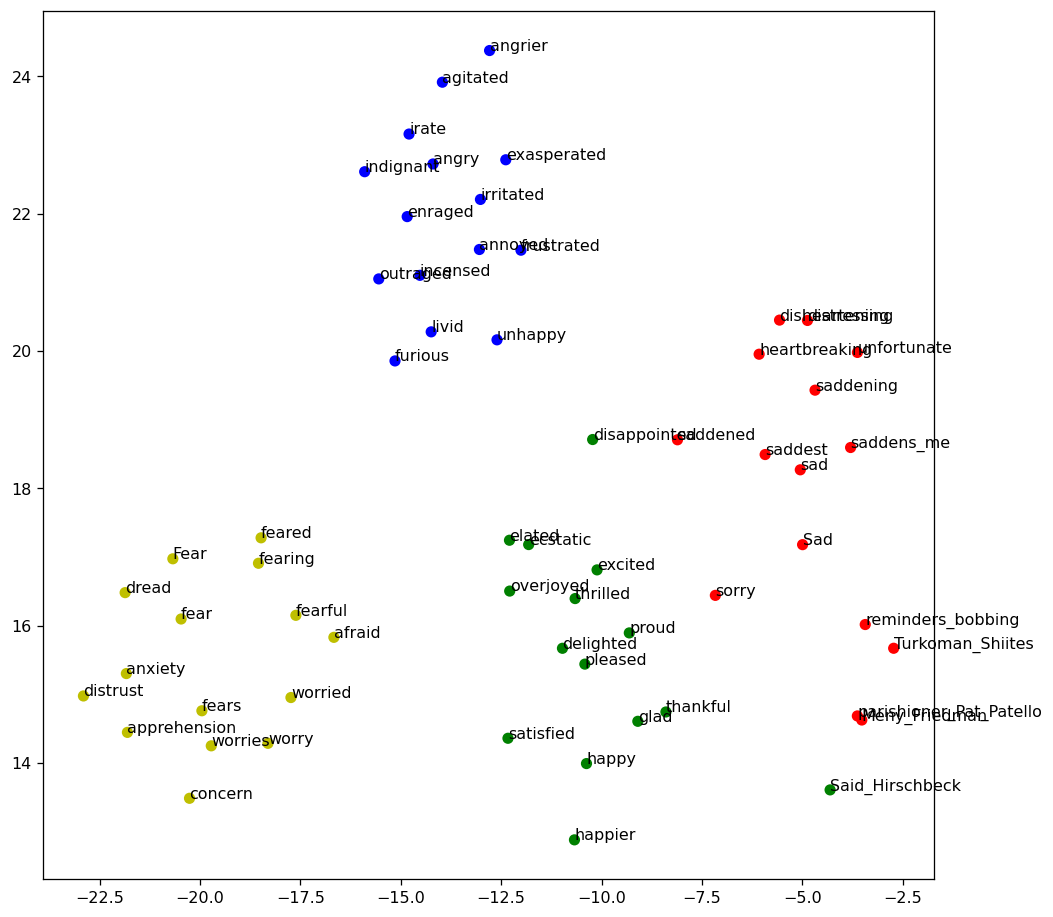

In [17]:
# Answer here
from sklearn.manifold import TSNE

list_word = ['angry','happy','sad','fear']

list_angry = ['angry']+[word for word,similarity in w2v_google_model.most_similar('angry',topn=14)]
list_happy = ['happy']+[word for word,similarity in w2v_google_model.most_similar('happy',topn=14)]
list_sad = ['sad']+[word for word,similarity in w2v_google_model.most_similar('sad',topn=14)]
list_fear = ['fear']+[word for word,similarity in w2v_google_model.most_similar('fear',topn=14)]

list_target_words = list_angry+list_happy+list_sad+list_fear
list_word_train = list_target_words + list(w2v_google_model.vocab.keys())[0:200]

tsne = TSNE(n_components = 2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(w2v_google_model[list_word_train])

fig = plt.figure(figsize = (10,10), dpi=115)
ax = fig.subplots()
color = ['b'] * 15 + ['g'] * 15 + ['r'] * 15 + ['y'] * 15
ax.scatter(X_tsne[0:60,0],X_tsne[0:60,1], c = color)
for word,x,y in zip(list_word_train,X_tsne[0:60,0],X_tsne[0:60,1]):
    ax.annotate(word, xy=(x,y), xytext=(0,0),  textcoords='offset points')